<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Roslingâ€™s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [30]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [31]:
income.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
2  afg  1802                                                603    
3  afg  1803                                                603    
4  afg  1804                                                603

In [32]:
lifespan.head()

geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42

In [33]:
population.head()

geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000

In [34]:
pd.options.display.max_columns = 500
entities.head()

country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN                              NaN           NaN           NaN   
2     afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3     ago   NaN                              NaN           NaN           NaN   
4     aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries  \
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   
1               Aruba  NaN  NaN  NaN  NaN  NaN  NaN                 others   
2         Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
3              Angola  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
4                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   

  gapminder_list god_id gwid        income_groups  is--country  \
0       Abkhazia  GE-AB   i0                  NaN         True   
1          Aruba     AW  i12          high_income         True   
2    Afghanistan     AF   i1           low_income         True   
3         Angola     AO   i7  upper_middle_income         True   
4       Anguilla     AI   i8                  NaN         True   

  iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  landlocked  \
0              NaN              NaN                NaN       NaN         NaN   
1               AW              ABW              533.0       NaN   coastline   
2               AF              AFG                4.0       NaN  landlocked   
3               AO              AGO               24.0       NaN   coastline   
4               AI              AIA              660.0       NaN   coastline   

   latitude  longitude main_religion_2008         name        pandg  un_state  \
0       NaN        NaN                NaN     Abkhazia          NaN     False   
1  12.50000  -69.96667          christian        Aruba          NaN     False   
2  33.00000   66.00000             muslim  Afghanistan  AFGHANISTAN      True   
3 -12.50000   18.50000          christian       Angola       ANGOLA      True   
4  18.21667  -63.05000          christian     Anguilla          NaN     False   

  unicode_region_subtag upper_case_name world_4region        world_6region  
0                   NaN             NaN        europe  europe_central_asia  
1                    AW           ARUBA      americas              america  
2                    AF     AFGHANISTAN          asia           south_asia  
3                    AO          ANGOLA        africa   sub_saharan_africa  
4                    AI        ANGUILLA      americas              america

In [35]:
concepts.head()

concept color concept_type  \
0                  adults_with_hiv_percent_age_15_49   NaN      measure   
1                          age_at_1st_marriage_women   NaN      measure   
2                 aged_15_24_employment_rate_percent   NaN      measure   
3               aged_15_24_unemployment_rate_percent   NaN      measure   
4  aged_15_64_labour_force_participation_rate_per...   NaN      measure   

                                         description description_long domain  \
0  The estimated percentage of adults aged 15 to ...              NaN    NaN   
1  The mean age, in years, of first marriage for ...              NaN    NaN   
2  Percentage of total population, age group 15-2...              NaN    NaN   
3  Percentage of total population, age group 15-2...              NaN    NaN   
4  For age group 15-64, percentage of all labour ...              NaN    NaN   

  drill_up indicator_url                                            name  \
0      NaN           NaN                  Adults with HIV (%, age 15-49)   
1      NaN           NaN                     Age at 1st marriage (women)   
2      NaN           NaN                  Aged 15-24 employment rate (%)   
3      NaN           NaN                Aged 15-24 unemployment rate (%)   
4      NaN           NaN  Aged 15-64 labour force participation rate (%)   

                     name_catalog                           name_short  \
0  Adults with HIV (%, age 15-49)                      Adults with HIV   
1     Age at 1st marriage (women)                  Age at 1st marriage   
2                      Aged 15-24                  Employment rate (%)   
3                      Aged 15-24                Unemployment rate (%)   
4                      Aged 15-64  Labour force participation rate (%)   

              scales source source_long  \
0  ["log", "linear"]    NaN         NaN   
1  ["linear", "log"]    NaN         NaN   
2  ["linear", "log"]    NaN         NaN   
3  ["linear", "log"]    NaN         NaN   
4  ["linear", "log"]    NaN         NaN   

                                          source_url  \
0  https://www.gapminder.org/gapminder-world/docu...   
1  https://www.gapminder.org/data/documentation/g...   
2                       https://www.ilo.org/ilostat/   
3                       https://www.ilo.org/ilostat/   
4                       https://www.ilo.org/ilostat/   

                         tags  
0                         hiv  
1                  population  
2             employment_rate  
3                unemployment  
4  labour_force_participation

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [36]:
### no need for anything but default merge cause two columns are basically the same
###Matches in both files then it merges (inner join is default actually ohhhh)
df = pd.merge(income,lifespan)
df.shape

(40437, 4)

In [37]:
df = pd.merge(df,population)
df.shape

(40437, 5)

In [38]:
### grab specific vars from entities column
entities_variable = ['country','name','world_6region']
entities = entities[entities_variable]
print(entities.shape)

(273, 3)


In [0]:
df = pd.merge(df,entities,left_on='geo',right_on='country')

In [40]:
df = df.drop(['geo','country'],axis='columns')
df.head()

time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  1800                                                603       
1  1801                                                603       
2  1802                                                603       
3  1803                                                603       
4  1804                                                603       

   life_expectancy_years  population_total         name world_6region  
0                  28.21           3280000  Afghanistan    south_asia  
1                  28.20           3280000  Afghanistan    south_asia  
2                  28.19           3280000  Afghanistan    south_asia  
3                  28.18           3280000  Afghanistan    south_asia  
4                  28.17           3280000  Afghanistan    south_asia

In [41]:
merged = df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
    'life_expectancy_years':'lifespan',
    'population_total':'population',
    'name':'country',
    'world_6region':'region'
})

merged.head()

year  income  lifespan  population      country      region
0  1800     603     28.21     3280000  Afghanistan  south_asia
1  1801     603     28.20     3280000  Afghanistan  south_asia
2  1802     603     28.19     3280000  Afghanistan  south_asia
3  1803     603     28.18     3280000  Afghanistan  south_asia
4  1804     603     28.17     3280000  Afghanistan  south_asia

## Explore data

In [44]:
merged.describe()

year         income      lifespan    population
count  40437.000000   40437.000000  40437.000000  4.043700e+04
mean    1909.292900    4619.492717     43.132080  1.371204e+07
std       63.308682   10209.571045     16.313228  6.606335e+07
min     1800.000000     247.000000      1.000000  2.128000e+03
25%     1854.000000     876.000000     31.160000  4.113310e+05
50%     1909.000000    1442.000000     35.500000  1.985952e+06
75%     1964.000000    3488.000000     55.970000  6.499707e+06
max     2018.000000  177522.000000     84.170000  1.415046e+09

In [45]:
merged.describe(exclude='number')

country               region
count    40437                40437
unique     187                    6
top      Haiti  europe_central_asia
freq       219                10778

In [46]:
merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [47]:
usa = merged[merged.country=='United States']
usa.head()

year  income  lifespan  population        country   region
38028  1800    2127     39.41     6801854  United States  america
38029  1801    2167     39.41     6933517  United States  america
38030  1802    2202     39.41     7067728  United States  america
38031  1803    2166     39.41     7204538  United States  america
38032  1804    2165     39.41     7343995  United States  america

In [49]:
usa[usa.year.isin([1999,1984,2012])]

year  income  lifespan  population        country   region
38212  1984   32110     74.64   238573861  United States  america
38227  1999   44673     76.78   278862277  United States  america
38240  2012   50520     78.91   313335423  United States  america

## Plot visualization

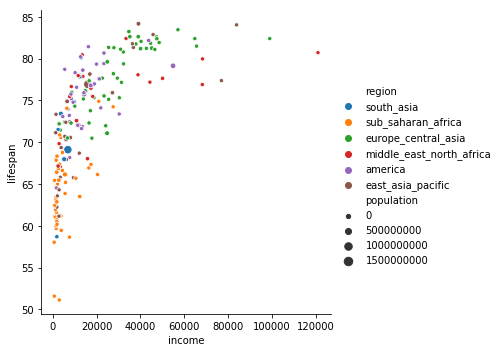

In [56]:
import seaborn as sns
now = merged[merged['year'] == 2018]
sns.relplot(x='income',y='lifespan',hue='region',size='population', data=now)

In [59]:
qatar_now = now[(now.income > 80000) & (now.country == 'Qatar')].sort_values(by='income')
qatar_now

year  income  lifespan  population country                    region
30362  2018  121033     80.71     2694849   Qatar  middle_east_north_africa

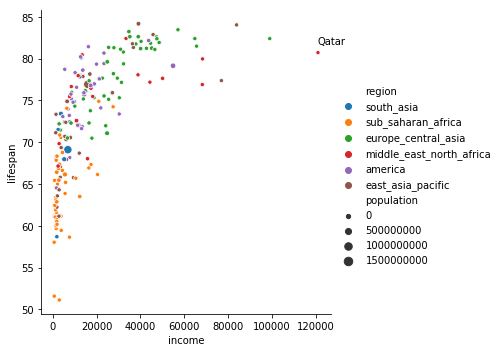

In [64]:
### lil diff than matplotlib
sns.relplot(x='income',y='lifespan',hue='region',size='population', data=now);
# This comes outta nowhere; it's what gets returned
plt.text(x=qatar_now.income,y=qatar_now.lifespan+1,s='Qatar');

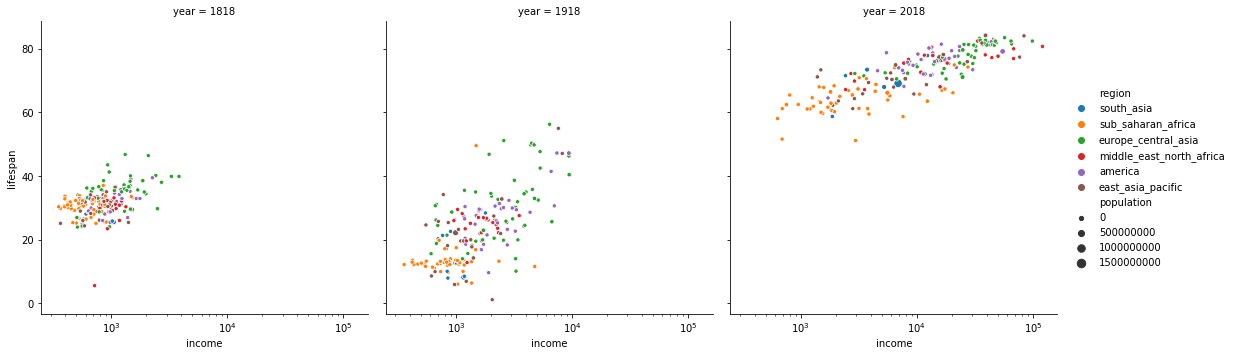

In [73]:
### .isin is pretty useful, checks if years in list are in year and puts those in centuries

years=[1818,1918,2018]

centuries=merged[merged.year.isin(years)]

### col parameter gives us the three graphs
sns.relplot(x='income',y='lifespan',hue='region',size='population', col='year',data=centuries);
plt.xscale('log');

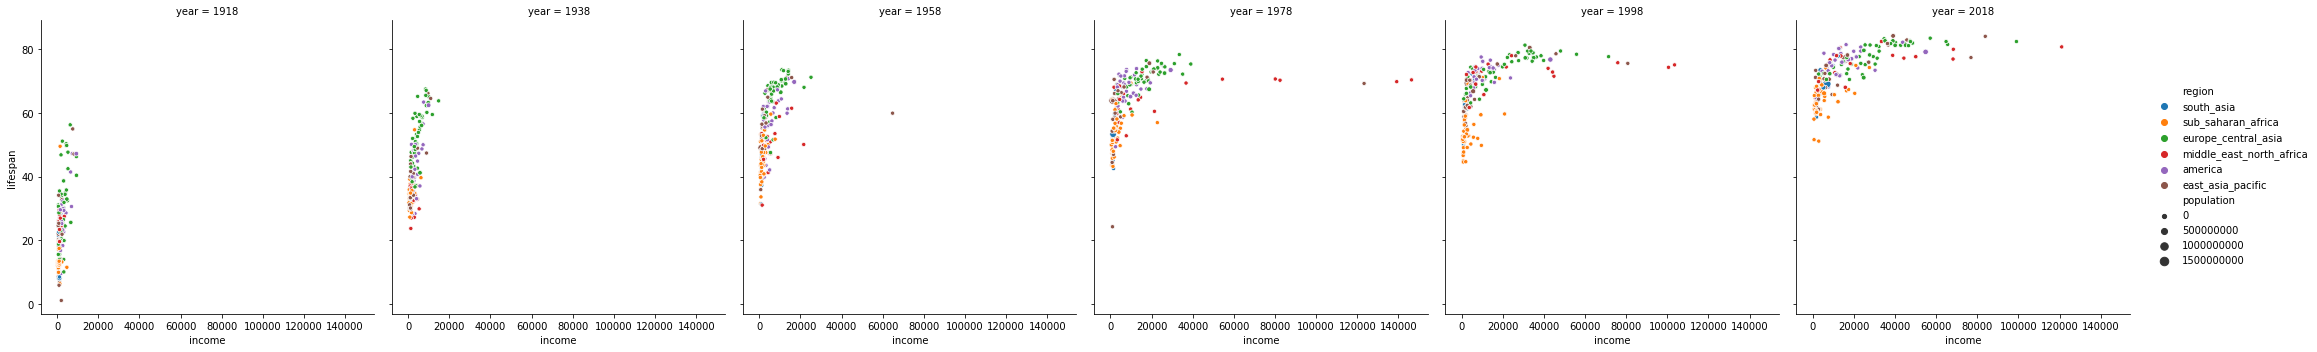

In [76]:
years = [1918,1938,1958,1978,1998,2018]
decades = merged[merged.year.isin(years)]

sns.relplot(x='income',y='lifespan',hue='region',size='population', col='year',data=decades);
### log wasn't working for some reason

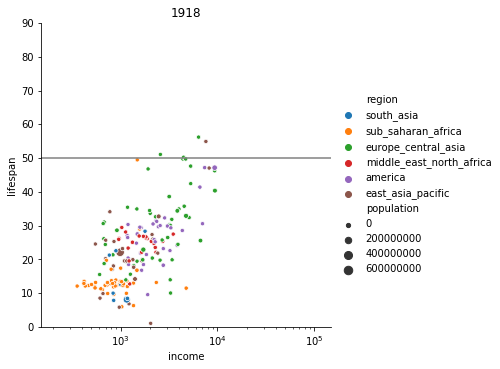

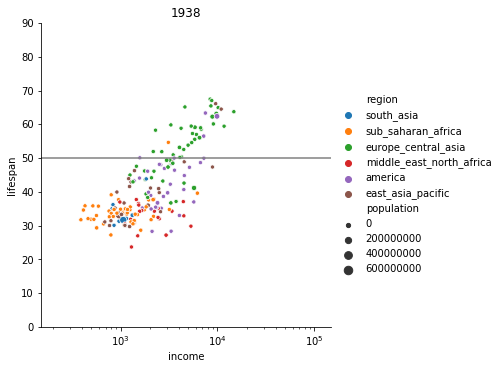

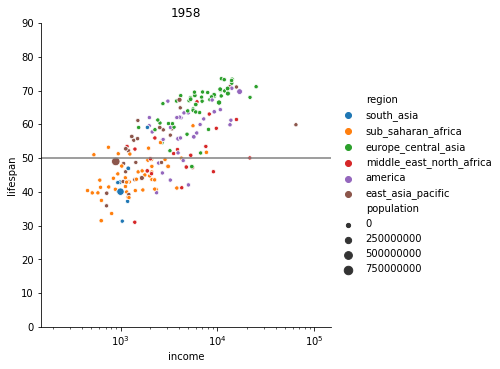

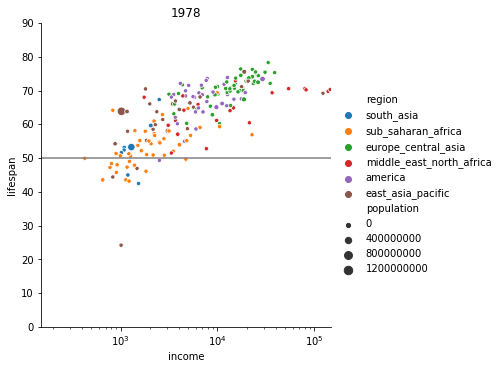

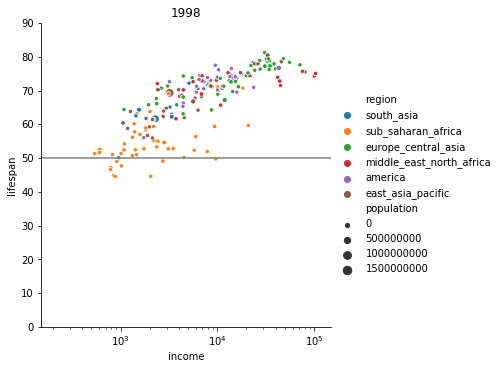

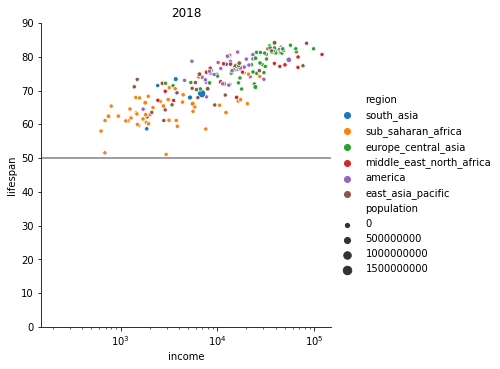

In [78]:
### make a graph for every year in the list years
for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=merged[merged.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0, 90))
    plt.title(year)
    plt.axvline(x=1000, color='grey')

In [82]:
merged[(merged.year==1918)&(merged.lifespan>45)]

year  income  lifespan  population        country               region
1698   1918    7610     54.95     5066003      Australia    east_asia_pacific
6297   1918    7396     47.20     8371555         Canada              america
6516   1918    9378     46.26     3870678    Switzerland  europe_central_asia
10067  1918    6393     56.24     3165276        Denmark  europe_central_asia
16856  1918    4400     49.77     3034544        Ireland  europe_central_asia
17513  1918    2576     51.11      115504        Iceland  europe_central_asia
24130  1918    1924     46.81      253737          Malta  europe_central_asia
26977  1918    5295     47.65     6735715    Netherlands  europe_central_asia
27196  1918    4479     50.28     2576646         Norway  europe_central_asia
27634  1918    8223     47.08     1167095    New Zealand    east_asia_pacific
34204  1918    4702     49.76     5819451         Sweden  europe_central_asia
34642  1918    1487     49.50       24384     Seychelles   sub_saharan_africa
38146  1918    9371     47.18   106721812  United States              america

In [83]:
# aw Central African Republic & Lesotho :(
merged[(merged.year==2018) & (merged.lifespan<55)]

year  income  lifespan  population                   country  \
6178   2018     689     51.58     4737423  Central African Republic   
21774  2018    2960     51.12     2263010                   Lesotho   

                   region  
6178   sub_saharan_africa  
21774  sub_saharan_africa

## Analyze outliers

In [0]:
### ??? 

## Plot multiple years

In [0]:
### ???

## Point out a story

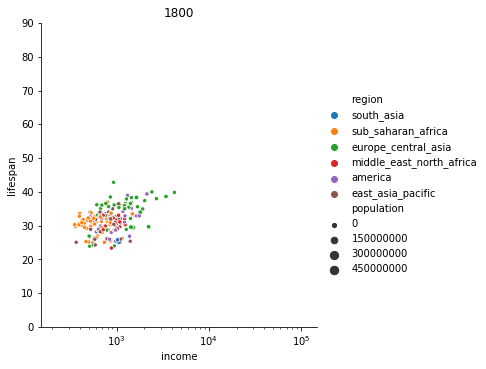

In [86]:
year = 1800 #@param {type:"slider",min:1800,max:2018,step:1}

sns.relplot(x='income',y='lifespan',hue='region',size='population',
           data=merged[merged.year==year])

plt.xscale('log')
plt.xlim((150,150000))
plt.ylim((0,90))
plt.title(year);

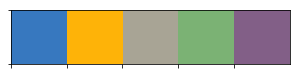

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

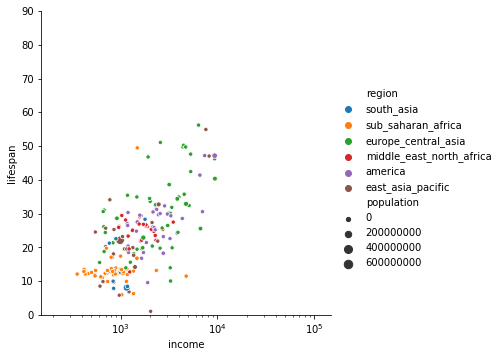

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

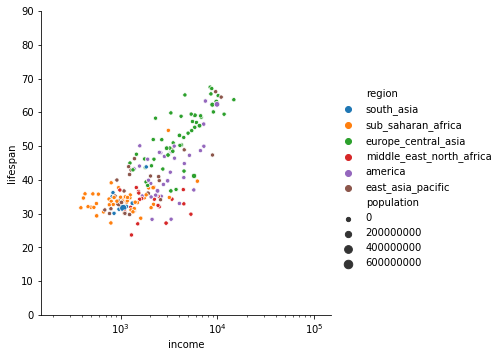

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

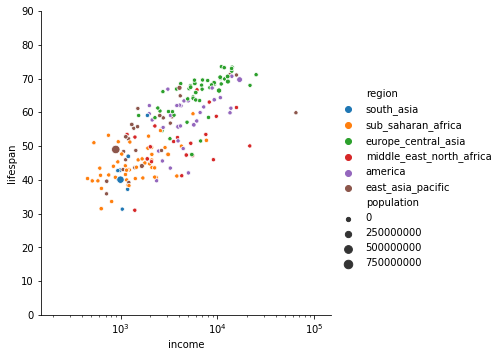

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

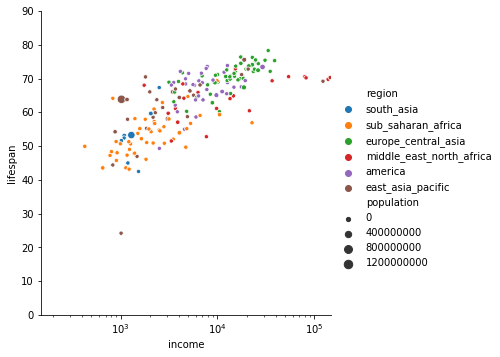

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

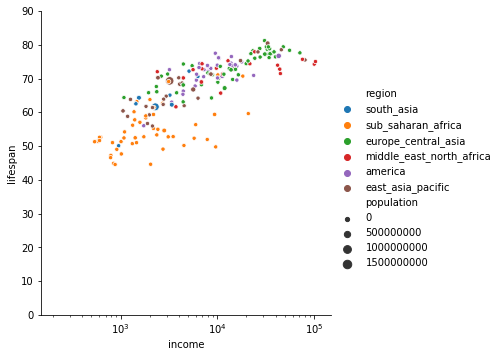

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

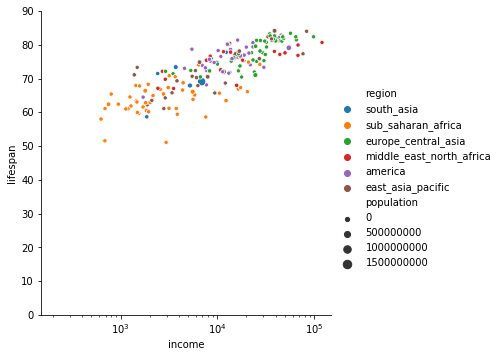

<IPython.core.display.Javascript object>

In [88]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB
### Wow that's cool, xkcd_palette
colors=['windows blue','amber','greyish','faded green','dusty purple']
sns.palplot(sns.xkcd_palette(colors));

from google.colab import widgets
# nice making a list of the years
tb=widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb,years):
  sns.relplot(x='income',y='lifespan',hue='region',size='population',
             data=merged[merged.year==year])
  plt.xscale('log')
  ### Setting limits, chose zero instead of 20 like Ryan
  plt.xlim((150,150000))
  plt.ylim((0,90))

# ASSIGNMENT
Replicate the lesson code:

"*Go through each line of code and ask yourself if you understand it*" - Mr. Allred

- Improve the Gapminder graph we made during lecture. 
- Add a title and subtitle to graph
- Change dot size
- (Optional) see how graph looks using the 4 regions as opposed to the 6 regions.
- (Optional) small ticks marks at bottom that are all grouped together
- (Optional) color options/hues

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

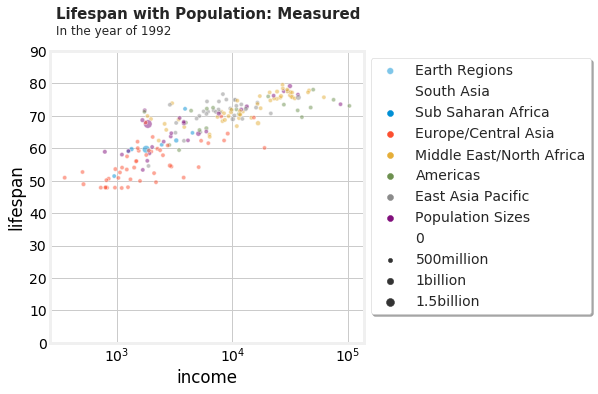

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

### Setting it up just to be sure the data is loaded from other cells
year = 1992
now = merged[merged['year'] == year]

fig,ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor('white')
ax.set(facecolor='white')

sns.set_style("ticks")
sns.scatterplot(x='income',y='lifespan',hue='region',
                size='population',alpha=.50,legend='brief',
                data=now,ax=ax)

# Change legend to be out of bounds
Leg_labels = ['Earth Regions','South Asia','Sub Saharan Africa',
              'Europe/Central Asia','Middle East/North Africa',
              'Americas','East Asia Pacific',
              'Population Sizes','0','500million','1billion','1.5billion']
Leg = ax.legend(loc='best',bbox_to_anchor=(1,1), ncol=1,
                fancybox=True,shadow=True,labels=Leg_labels);

#Leg.get_texts()[0].set_text('REGIONS')

# Setting the xscale to symlog and y-limit
plt.xscale('symlog')
plt.ylim((0, 90))

# Set title and subtitle
ax.text(x=300,y=100,s="Lifespan with Population: Measured",fontweight="bold",fontsize="15")
ax.text(x=300,y=95,s="In the year of 1992",fontweight="ultralight",fontsize="12")

plt.show();

In [242]:
import matplotlib.animation as animation
%matplotlib notebook
merged.head()

year  income  lifespan  population      country      region
0  1800     603     28.21     3280000  Afghanistan  south_asia
1  1801     603     28.20     3280000  Afghanistan  south_asia
2  1802     603     28.19     3280000  Afghanistan  south_asia
3  1803     603     28.18     3280000  Afghanistan  south_asia
4  1804     603     28.17     3280000  Afghanistan  south_asia

In [243]:
merged.population.count()

40437

In [250]:
title = "Population and Year!"
def get_d(table,rownum,title):
  data = pd.DataFrame(table.astype(float))
  data.columns={title}
d = get_d(merged.population,18,title)
x = np.array(d.index)
y = np.array(d['population'])
population = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
population.columns = {title}

### Shelving for now!

AttributeError: ignored